In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv('a_r_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
sns.set_style("whitegrid")

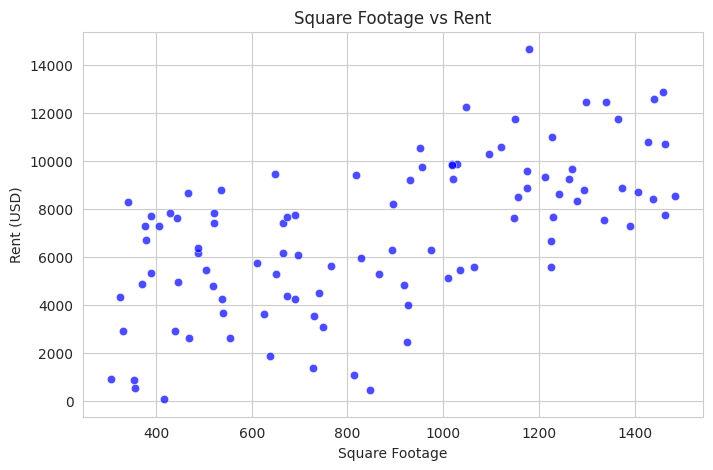

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataset["SquareFootage"], y=dataset["Rent"], color="blue", alpha=0.7)
plt.xlabel("Square Footage")
plt.ylabel("Rent (USD)")
plt.title("Square Footage vs Rent")
plt.show()

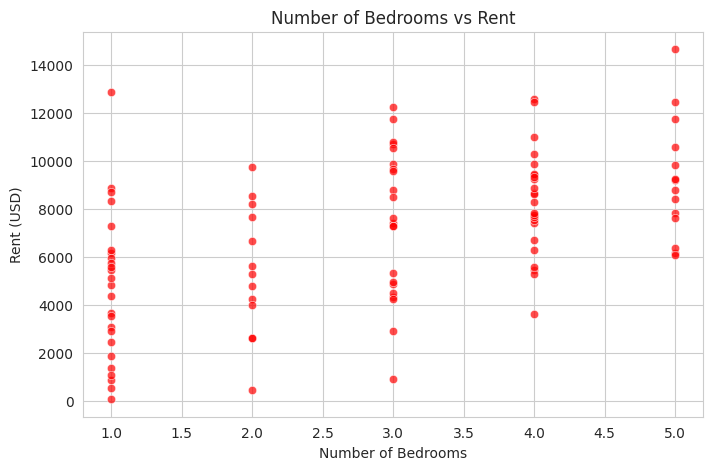

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataset["Bedrooms"], y=dataset["Rent"], color="red", alpha=0.7)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent (USD)")
plt.title("Number of Bedrooms vs Rent")
plt.show()

In [8]:
locations = ["Downtown", "Suburbs", "Countryside"]
dataset["Location"] = np.random.choice(locations, 100)

In [11]:
encoder = LabelEncoder()
dataset["LocationEncoded"] = encoder.fit_transform(dataset["Location"])

In [12]:
print(dataset.head())

   SquareFootage  Bedrooms      Rent  Location  LocationEncoded
0          749.4         1   3071.84   Suburbs                2
1         1440.9         4  12558.87  Downtown                1
2         1178.4         5  14636.64   Suburbs                2
3         1018.4         4   9884.75   Suburbs                2
4          487.2         5   6184.77   Suburbs                2


In [14]:
X_rent = dataset[["SquareFootage", "Bedrooms", "LocationEncoded"]]
y_rent = dataset["Rent"]
X_train_rent, X_test_rent, y_train_rent, y_test_rent = train_test_split(X_rent, y_rent, test_size=0.2, random_state=42)

In [15]:
model_rent = LinearRegression()
model_rent.fit(X_train_rent, y_train_rent)

LinearRegression()

In [16]:
y_pred_rent = model_rent.predict(X_test_rent)

In [17]:
print(f"Coefficient: {model_rent.coef_}")
print(f"Intercept: {model_rent.intercept_}")

Coefficient: [   4.88986709 1085.87238047  744.7165683 ]
Intercept: -1482.50233759389


In [19]:
mae_rent = mean_absolute_error(y_test_rent, y_pred_rent)
mse_rent = mean_squared_error(y_test_rent, y_pred_rent)
r2_rent = r2_score(y_test_rent, y_pred_rent)

In [20]:
print(f"MAE: {mae_rent}")
print(f"MSE: {mse_rent}")
print(f"R²: {r2_rent}")

MAE: 2006.636109255848
MSE: 5367047.363330153
R²: 0.006183444516990377


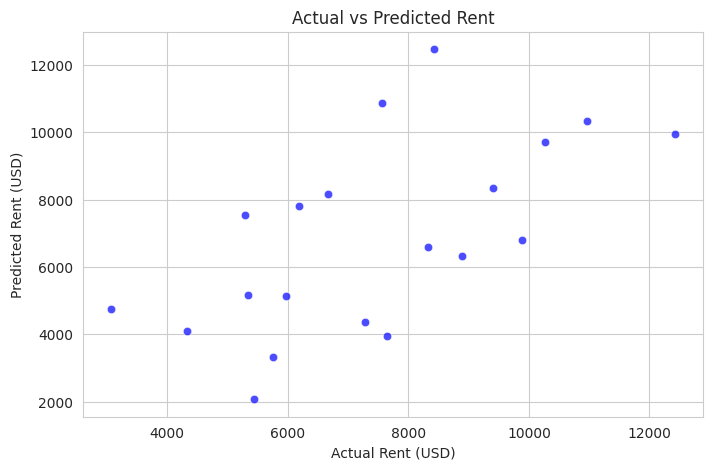

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_rent, y=y_pred_rent, color="blue", alpha=0.7)
plt.xlabel("Actual Rent (USD)")
plt.ylabel("Predicted Rent (USD)")
plt.title("Actual vs Predicted Rent")
plt.show()